# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Loading dataset

In [2]:
data = pd.read_csv('drug200.csv')

In [3]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
Age            200 non-null int64
Sex            200 non-null object
BP             200 non-null object
Cholesterol    200 non-null object
Na_to_K        200 non-null float64
Drug           200 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


## Data visualization

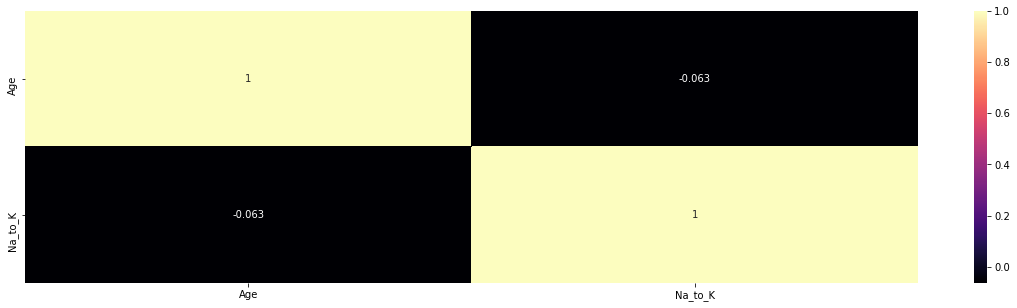

In [5]:
import seaborn as sb

corr_mat = data.corr()
top_features = corr_mat.index
plt.figure(figsize=(20, 5))

sb.heatmap(data.corr(), annot=True, cmap='magma')

Total drugA = 23
Tota; drugB = 16
Tota; drugC = 16
Tota; drugX = 54
Tota; drugY = 91


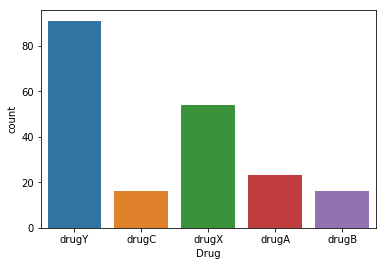

In [6]:
sb.countplot(data['Drug'])
print('Total drugA = {0}'.format(len(data.loc[data['Drug']=='drugA'])))
print('Tota; drugB = {0}'.format(len(data.loc[data['Drug']=='drugB'])))
print('Tota; drugC = {0}'.format(len(data.loc[data['Drug']=='drugC'])))
print('Tota; drugX = {0}'.format(len(data.loc[data['Drug']=='drugX'])))
print('Tota; drugY = {0}'.format(len(data.loc[data['Drug']=='drugY'])))

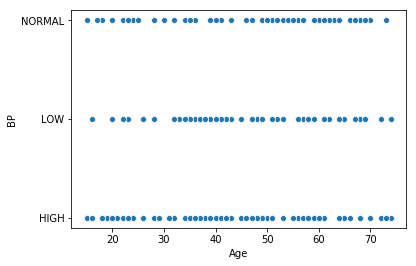

In [7]:
sb.scatterplot(x=data['Age'], y=data['BP'])

# Checking if there any null Values present

In [8]:
data.isnull().values.any()

False

# fetching Independent and Dependent variables

In [9]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [10]:
X = data.iloc[:, 0:5].values
y = data.iloc[:, 5].values

# Data Preprocessing

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
print('Sex: ',data['Sex'].unique())
print('BP: ', data['BP'].unique())
print('Cholesterol: ',data['Cholesterol'].unique())

Sex:  ['F' 'M']
BP:  ['HIGH' 'LOW' 'NORMAL']
Cholesterol:  ['HIGH' 'NORMAL']


In [13]:
# Converting categorical columns (Sex, BP, Cholestrol) into numerical type

le_sex =LabelEncoder().fit(['M', 'F'])
X[:, 1] = le_sex.transform(X[:, 1])

le_bp = LabelEncoder().fit(['HIGH', 'LOW', 'NORMAL'])
X[:, 2] = le_bp.transform(X[:, 2])

le_cholesterol = LabelEncoder().fit(['HIGH', 'NORMAL'])
X[:, 3] = le_cholesterol.transform(X[:, 3])

In [14]:
X[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.113999999999999],
       [28, 0, 2, 0, 7.797999999999999],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [15]:
y[0:5]

array(['drugY', 'drugC', 'drugC', 'drugX', 'drugY'], dtype=object)

# Spliting the dataset into Training and Testing Sets

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=3)

# Building Model

In [17]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

In [18]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# Evaluating the Model

In [19]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
print('Accuracy: {0}'.format(accuracy_score(y_test, y_pred)*100))

Accuracy: 98.33333333333333
